In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as patches
import math


Path = mpath.Path

## -OPERACOES MATEMATICAS/




In [2]:
# Soma de vetores
# (n,m) + (a,b) = (n+a, n+b)  -> se (n,m) = v1 e (a,b) = v2, então (n+a, n+b) = v1+v2
def somaVetor(vet1, vet2):
    return tuple(map(lambda a,b: a+b, vet1,vet2))

print (somaVetor([800,9],[1,1]))

(801, 10)


In [3]:
# Subtração de vetores
# (n,m) - (a,b) = (n-a, n-b)  -> se (n,m) = v1 e (a,b) = v2, então (n-a, n-b) = v1-v2
def subVetor(vet1, vet2):
    return tuple(map(lambda a,b: a-b, vet1,vet2))

print (subVetor([800,9],[1,1]))

(799, 8)


In [4]:
#Vetor por escalar
# (n,m) * (k) = (n*k, m*k)   -> se (n,m) = v1, então (n*k, m*k) = v1*k
def prodPorEscalar(vet1, fat):
    return tuple(map(lambda a: a*fat, vet1))

print (prodPorEscalar([4,12],3))

(12, 36)


In [5]:
#Equação Vetorial da Reta
# r = Po + (t * u)   <-  Po = (n,m); t = (a,b); u = k.
# r = (n,m) + ((a,b)*k)
vetReta = lambda p, t: lambda u: somaVetor(p, prodPorEscalar(t,u))

vetReta((0, 0.8), (0.2, 0.8))(1)
vetReta((0,0.8),(-1,0))(0)
    

(0, 0.8)

In [6]:
#Equação Vetorial-definida por dois pontos da Reta 
# r = Po + ((t - Po) * u)   <-  Po = (n,m); t = (a,b); u = k.
# r = (n,m) + (((a,b)-(n,m))*k)
vetRetaP = lambda p, t: lambda u: somaVetor(p, prodPorEscalar(subVetor(t,p),u))

vetRetaP((0, 0.8), (0.2, 0.8))
vetRetaP((0,0.8),(-1,0))
 

<function __main__.<lambda>.<locals>.<lambda>(u)>

## DEFINIÇÃO DAS FORMAS - CURVS, RETAS, CIRCUNFERÊNCIAS, ELIPSES, ETC. 
##### A ordem é definida pelos indíces na imagem. 

In [7]:
### DEFINIÇÃO DOS PONTOS DE CURVAS E RETAS.
#######A ORDEM ESTA DESCRITA NA IMAGEM!!!
#Conferir a parte à qual pertence do carro pela imagem "Índice - Carroceria"

#variáveis de prefixo 'r' são retas.
    #por exemplo: r2 é reta r2 na imagem.
#Variáveis de com prefixo C são curvas.
    #por exemplo na variável C7_1x:
        #7 é o indíce da curva (definido na imagem)
        #1 é a posição do ponto na curva
        #1 quer dizer que esse é o ponto do meio da curva; o ponto de controle.
            #0 e 2 são, respectivamente, o primeiro e o último ponto da curva
            #Normalmente o ponto 1 é relativo ao ponto 0 e 2 ao 1, mas isso pode variar
            #Para funções cúbicas (que tem 4 pontos), o valor para seus pontos
                #vai de 0 à 3, sendo 0 e 3 as extremidades e 1 e 2 os pontos de controle
        #o ultimo elemento da variável pode ser x ou y, referente ao eixo que define o ponto

#Parachoque-Traseiro, Baixo - Curva #1
C1_0x = 0;          C1_0y = 0;   #Extremidade. Ponto 0 da curva. Seu vetor é (0.0, 0.0)
C1_1x = -0.84;        C1_1y = 0.14; #Ponto de controle. Ponto 1 da curva. Afeta a curvatura. Seu vetor é (-0.45,0.6)
C1_2x = -1.01;         C1_2y = 0.42; #Extremidade. Ponto 2 da curva. Seu vetor é (-0.5, 0.7)
#1

r1a = vetRetaP((C1_2x, C1_2y), (-1.087, 0.455))
r2 = vetRetaP((r1a(1)), (-1.09, 0.697)) #ParaChoque traseiro #2
r3 = vetRetaP(r2(1), (-1.014, 0.797)) #Farol traseiro #3
r4 = vetRetaP(r3(1), (-0.909, 1.32)) #Farol traseiro #4
r5 = vetRetaP(r4(1), (-1.01, 1.588)) #Acima do farol #5


#Base do Aerofólio #6
C6_0x = r5(1)[0];     C6_0y = r5(1)[1];
C6_1x = -0.747;   C6_1y = 1.465; #As coordenadas desse ponto são relativa ao ponto anterior (C6_0)
C6_2x = -0.173;   C6_2y = 1.547;
#6

#Teto-Lateral - Curva #7
C7_0x = C6_2x;        C7_0y = C6_2y;
C7_1x = 2.29;         C7_1y = 2.224;
C7_2x = 2.82;         C7_2y = 2.08;
C7_3x = 3.544;         C7_3y = 1.262 ;
#7


r8 = vetRetaP((C7_3x, C7_3y), (5, 1.31)) #Capô #8


#Capo-Farol Dianterio - Curva #9
C9_0x = r8(1)[0];     C9_0y = r8(1)[1];
C9_1x = 7.05;         C9_1y = 1.31;
C9_2x = 7.67;         C9_2y = 0.477;
#9

#Parachoque Dianteiro - Curva #10 
C10_0x = C9_2x;      C10_0y = C9_2y;
C10_1x = 7.523;      C10_1y = 0.38;
C10_2x = 7.472;      C10_2y = 0.085;
#10


# -.1 = -0.1
r11 = vetRetaP((C10_2x, C10_2y), (7.72, -0.026))  #Parachoque Dianteiro #11

r12 = vetRetaP((r11(1)[0], r11(1)[1]), (7.69, -0.103)) #Parachoque Dianteiro #12

# r13 = vetRetaP((r12(1)[0], r12(1)[1]), (-0.5, -0.01)) #Parachoque Dianteiro #13
#Parachoque Dianteiro - Curva #13 
C13_0x = r12(1)[0];  C13_0y = r12(1)[1]
C13_1x = 6.938;      C13_1y = -0.255;
C13_2x = 6.798;      C13_2y = -0.15;
#13



#Paralama dianteiro - Curva (Cúbica) #14
C14_0x = C13_2x;      C14_0y = C13_2y;
C14_1x = 7.014;       C14_1y = 1.241;
C14_2x = 5.036;       C14_2y = 1.364;
C14_3x = 5.227;       C14_3y = -0.203;  #Alinhado com a interseção entra a reta 8 e a curva 9 (meio do capô)
#14


#reta r15 #Saia lateral
r15 = vetRetaP((C14_3x, C14_3y), (2.342, -0.118))



#Saia lateral #Curva #16
C16_0x = r15(1)[0];    C16_0y = r15(1)[1];
C16_1x = 2.176;        C16_1y = 0.174;
C16_2x = 1.597;        C16_2y = 0.159;
#16

#Paralama traseiro - Curva (Cúbica) # 17
C17_0x = C16_2x;       C17_0y = C16_2y;
C17_1x = 1.575;        C17_1y = 1.45;
C17_2x = -0.182;       C17_2y = 1.32;
C17_3x = 0;            C17_3y = 0;
#17




#Roda Traseira <Eixo> - Circunferência #18
Circ18_X = 0.78;   Circ18_Y = 0.3198  ;
Circ18_R = 0.0565 ;    Circ18_lw = 1;
#18

#Pneu Traseiro - Circunferência # 19
Circ19_X = Circ18_X;   Circ19_Y = Circ18_Y  ;
Circ19_R = 0.632 ;    Circ19_lw = 4;
#19 - AUMENTAR A ESPESSURA NA HORA DE PLOTAR

#Roda Dianteira <Eixo> - Circunferência #20
Circ20_X = 6.01;   Circ20_Y = 0.2204  ;
Circ20_R = 0.0554 ;    Circ20_lw = 1;
#20

#Pneu Dianteiro - Circunferência #21
Circ21_X = 6.01;   Circ21_Y = 0.2204  ;
Circ21_R = 0.5991 ;    Circ21_lw = 4;
#21





#Lanterna Traseira <Baixo> - Curva #22
C22_0x = -0.497;       C22_0y = 0.917;
C22_1x = -0.772;        C22_1y = 0.905;
C22_2x = -0.981;       C22_2y = 0.9583;
#22

#Lanterna Traseira <Frente> - Curva #23
C23_0x = C22_0x;       C23_0y = C22_0y;
C23_1x = -0.39;       C23_1y = 1.18;
C23_2x = -0.915;       C23_2y = 1.295;
#23

#Para-choque para Para-lama Traseiro - Curva #24
C24_0x = -1.106;       C24_0y = 0.698;
C24_1x = -0.517;       C24_1y = 0.528;
C24_2x = -0.054;       C24_2y = 0.528;
#24

#Para-choque para lanterna Traseiro - Curva #25
C25_0x = -0.838;       C25_0y = 0.624;
C25_1x = -0.532;       C25_1y = 0.624;
C25_2x = C22_0x;       C25_2y = C22_0y;
#25

#Farol traseiro para base base do aerofólio - Curva #26
C26_0x = C22_0x;       C26_0y = C22_0y;
C26_1x = -0.283;       C26_1y = 1.158;
C26_2x = -0.922;       C26_2y = 1.547;
#26

#Farol traseiro - Interno baixo - Curva #27
C27_0x = -0.973;       C27_0y = 1.03;
C27_1x = -0.785;       C27_1y = 0.966;
C27_2x = -0.577;       C27_2y = 0.984;
#27

#Farol traseiro - Interno alto - Curva #28
C28_0x = C27_2x;       C28_0y = C27_2y;
C28_1x = -0.456;       C28_1y = 1.14;
C28_2x = -0.929;       C28_2y = 1.261;
#28



r29 = vetRetaP((C16_2x, C16_2y), (C16_2x, -0.284))      #Escapamento lateral <prox a roda> - Reta #29
r30 = vetRetaP((r29(1)[0], r29(1)[1]), (1.825, -0.151))  #Escapamento lateral <inclinado> - Reta #30
r31 = vetRetaP((r30(1)[0], r30(1)[1]), (2.312, r30(1)[1]))   #Escapamento lateral <inclinado> - Reta #31


r32 = vetRetaP((6.638, 0.99), (7.196, 0.665)) #Farol dianteiro <trás> - Reta #32
r33 = vetRetaP((r32(1)[0], r32(1)[1]), (7.408, 0.619)) #Farol dianteiro <baixo> - Reta #33

#Farol dianteio - Frente/Fechamento - Curva # 34
C34_0x = r33(1)[0];    C34_0y = r33(1)[1];
C34_1x = 6.951;       C34_1y = 1.075;
C34_2x = r32(0)[0];       C34_2y = r32(0)[1];
#34

#Suave debaixo da porta - Esquerda - Curva #35
C35_0x = 1.924;    C35_0y = 0.302;
C35_1x = 1.713;       C35_1y = 0.314;
C35_2x = 1.696;       C35_2y = 0.264;
#35

#Suave debaixo da porta - Baixo - Curva #36
C36_0x = C35_2x;       C36_0y = C35_2y;
C36_1x = 2.68;       C36_1y = 0.1;
C36_2x = 5.04;       C36_2y = 0.044;
#36

#Suave debaixo da porta - Baixo - Curva #37
C37_0x = C36_2x;     C37_0y = C36_2y;
C37_1x = 5.096;       C37_1y = 0.073;
C37_2x = 4.316;       C37_2y = 0.155;
#37

#Abertura na parte traseiro da porta - Curva #38
C38_0x = 1.506;     C38_0y = 1.357;
C38_1x = 1.408;     C38_1y = 1.271;
C38_2x = 1.851;     C38_2y = 0.378;
#38

#Abertura de baixo da porta <esquerda> - Curva #39a
C39a_0x = C38_2x;   C39a_0y = C38_2y;
C39a_1x = 1.915;    C39a_1y = 0.215;
C39a_2x = 2.56;     C39a_2y = 0.233;
#39a


r39b = vetRetaP((C39a_2x, C39a_2y), (4.098, 0.172))      #Abertura de baixo da porta <Reta/Direita> - Reta #39b


r40a= vetRetaP((r39b(1)[0], r39b(1)[1]), (4.334, r39b(1)[1])) #Abertura do exaustor - Reta #40a


#Abertura do exaustor - Curva #40b
C40b_0x = r40a(1)[0];   C40b_0y = r40a(1)[1];
C40b_1x = 4.646;        C40b_1y = 0.483;
C40b_2x = 4.575;        C40b_2y = 0.693;
#40b

#Abertura do exterior - Curva #41
C41_0x = 4.559;         C41_0y = 0.7088;
C41_1x = 4.492;         C41_1y = 0.864;
C41_2x = 3.719;         C41_2y = 1.012;
#41


r42 = vetRetaP((3.688, 1.04), (2.905, 1.159)) #Curva abaixo do retrovisor (Alto relevo) - Reta #42

r42a = vetRetaP((3.701, 0.99), (2.905, 1.159))  #Curva abaixo do retrovisor (Baixo relevo) - Reta #42a

#Referência: "Carro - Indices - Contornos Internos 2.jpeg" - Curva #43
C43_0x = 3.703;         C43_0y = 0.999;
C43_1x = 3.696;         C43_1y = 1.163;
C43_2x = 3.572;         C43_2y = 1.238;
#43

#Referência: "Carro - Indices - Contornos Internos 2.jpeg" - Curva #44
C44_0x = 4.051;         C44_0y = 0.905;
C44_1x = 4.162;         C44_1y = 0.673;
C44_2x = r39b(1)[0];    C44_2y = r39b(1)[1];
#44

#Pequeno vão entre a porta e a janela - Curva (Cúbica) #45
C45_0x = C38_0x;        C45_0y = C38_0y;
C45_1x = 1.5047;        C45_1y = 1.372;
C45_2x = 1.59;          C45_2y = 1.3637;
C45_3x = 1.606;         C45_3y = 1.409;            
#45

#Janela <Baixo> - Curva (Cúbica) #46
C46_0x = 3.42;          C46_0y = 1.254;
C46_1x = 2.967;         C46_1y = 1.213;
C46_2x = 1.6;           C46_2y = 1.325;
C46_3x = 1.154;         C46_3y = 1.522;            
#46

#Janela <Trás> - Curva #47
C47_0x = C46_3x;        C47_0y = C46_3y;
C47_1x = 1.182;         C47_1y = 1.7165;
C47_2x = 1.467;         C47_2y = 1.764;          
#47

#Janela <Cima> - Curva #48
C48_0x = C47_2x;        C48_0y = C47_2y;
C48_1x = 2.529;         C48_1y = 1.963;
C48_2x = 2.916;         C48_2y = 1.693;          
#48

#Janela <Frente> - Curva #49
C49_0x = C48_2x;        C49_0y = C48_2y;
C49_1x = 3.209;         C49_1y = 1.507;
C49_2x = C46_0x;        C49_2y = C46_0y;          
#49

#Capa da Janela <Trás> - Curva (Cúbica) #50
C50_0x = 1.422;         C50_0y = 1.446;
C50_1x = 1.194;         C50_1y = 1.484;
C50_2x = 1.297;         C50_2y = 1.782;          
C50_3x = 1.792;         C50_3y = 1.814;          
#49

r51= vetRetaP((C50_3x, C50_3y), (1.661, 1.402)) #Capa da Janela - Reta #51







# Rear lip bumper - Lembrar que essa parte é preta
bC44_0x = -0.004;   bC44_0y = -0.022;
bC44_1x = -1.033;   bC44_1y = 0.01;
bC44_2x = -1.027;   bC44_2y = 0.385;

bC45_0x = -1.027;   bC45_0y = 0.385;
bC45_1x = -1.104;   bC45_1y = 0.377;
bC45_2x = -1.123;   bC45_2y = 0.448;

bC46_0x = 0.174;   bC46_0y = -0.147;
bC46_1x = -0.18;   bC46_1y = -0.2;
bC46_2x = -0.74;   bC46_2y = -0.043;

bC47_0x = -0.74;   bC47_0y = -0.043;
bC47_1x = -0.786;  bC47_1y = -0.025;
bC47_2x = -0.767;  bC47_2y = 0.087;

bC48_0x = -0.67;   bC48_0y = -0.21;
bC48_1x = -0.72;   bC48_1y = -0.181;
bC48_2x = -0.74;   bC48_2y = -0.043;

bC49_0x = 0.322;   bC49_0y = -0.234;
bC49_1x = -0.19;   bC49_1y = -0.285;
bC49_2x = -0.67;   bC49_2y = -0.21;

bC50_0x = -0.71;   bC50_0y = -0.176;
bC50_1x = -0.87;   bC50_1y = -0.152;
bC50_2x = -0.89;   bC50_2y = 0.143;

# Aerofólio - Lembrar que essa parte é preta

br51 = vetRetaP ((-0.384, 1.5), (-0.791, 1.517))


### DEFINIÇÃO DOS PONTOS DE CURVAS E RETAS. 



## ORGANIZACÃO DAS RETAS PARA PLOTAGEM

In [8]:
### DEFINIÇÃO DAS RETAS

pontos = [r1a,r2,r3,r4,r5,r8,r11, r12, r15, r29, r30, r31, r32, r33, r39b, r40a, r42, r51, br51] 
#Lista com todas as retas --- Coloque a variável das retas aqui.

#Função que desenha os pontos da reta. Itera sobre a lista dada e plota cada uma das retas.
def retasIntervaladas(pontos): 
    for r in pontos:
        #As coordenadas de cima são da primeira ponta, e as de baixo são a da outra ponta reta
        plt.plot([r(0)[0], r(1)[0]], #Esquerda = X; Direita = Y;
                [r(0)[1], r(1)[1]],
                color = 'r', lw=1.5) #Cor vermelha e espessura de 1.5
        

### DEFINIÇÃO DAS RETAS suaves

s_pontos = [r42a] #Lista com todas as retas --- Coloque a variável das retas aqui.

#Semelhante à função anterior, mas para desenhar retas de menos destaque na imagem. A mudança está na espessura da linha. 
#Que é menor.
def s_retasIntervaladas(s_pontos): 
    for r in pontos:
        #As coordenadas de cima são da primeira ponta, e as de baixo são a da outra ponta reta
        plt.plot([r(0)[0], r(1)[0]], #Esquerda = X; Direita = Y;
                [r(0)[1], r(1)[1]],
                color = 'r', lw=0.5) #Cor vermelha e espessura de 1.5



        






## ORGANIZAÇÃO DAS CURVAS QUADRÁTICAS PARA PLOTAGEM

In [9]:
### DEFINIÇÃO DAS CURVAS QUADRÁTICAS
verts = [(C1_0x, C1_0y), # P0
         (C1_1x, C1_1y), # P1
         (C1_2x, C1_2y), # P2
         
         (C6_0x, C6_0y), # P0
         (C6_1x, C6_1y), # P1
         (C6_2x, C6_2y), # P2
         
         (C9_0x, C9_0y), # P0
         (C9_1x, C9_1y), # P1
         (C9_2x, C9_2y), # P2
         
         (C10_0x, C10_0y), # P0
         (C10_1x, C10_1y), # P1
         (C10_2x, C10_2y), # P2
         
         (C13_0x, C13_0y), # P0
         (C13_1x, C13_1y), # P1
         (C13_2x, C13_2y), # P2
         
         (C16_0x, C16_0y), # P0
         (C16_1x, C16_1y), # P1
         (C16_2x, C16_2y), # P2
         
         (C22_0x, C22_0y), # P0
         (C22_1x, C22_1y), # P1
         (C22_2x, C22_2y), # P2
         
         (C23_0x, C23_0y), # P0
         (C23_1x, C23_1y), # P1
         (C23_2x, C23_2y), # P2
        
         (C25_0x, C25_0y), # P0
         (C25_1x, C25_1y), # P1
         (C25_2x, C25_2y), # P2
         
         (C26_0x, C26_0y), # P0
         (C26_1x, C26_1y), # P1
         (C26_2x, C26_2y), # P2
         
         (C27_0x, C27_0y), # P0
         (C27_1x, C27_1y), # P1
         (C27_2x, C27_2y), # P2
         
         (C28_0x, C28_0y), # P0
         (C28_1x, C28_1y), # P1
         (C28_2x, C28_2y), # P2
         
         (C34_0x, C34_0y), # P0
         (C34_1x, C34_1y), # P1
         (C34_2x, C34_2y), # P2
         
         (C38_0x, C38_0y), # P0
         (C38_1x, C38_1y), # P1
         (C38_2x, C38_2y), # P2
         
         (C39a_0x, C39a_0y), # P0
         (C39a_1x, C39a_1y), # P1
         (C39a_2x, C39a_2y), # P2
         
         (C40b_0x, C40b_0y), # P0
         (C40b_1x, C40b_1y), # P1
         (C40b_2x, C40b_2y), # P2
         
         (C41_0x, C41_0y), # P0
         (C41_1x, C41_1y), # P1
         (C41_2x, C41_2y), # P2
         
         (C43_0x, C43_0y), # P0
         (C43_1x, C43_1y), # P1
         (C43_2x, C43_2y), # P2
         
         (C44_0x, C44_0y), # P0
         (C44_1x, C44_1y), # P1
         (C44_2x, C44_2y), # P2
         
         (C47_0x, C47_0y), # P0
         (C47_1x, C47_1y), # P1
         (C47_2x, C47_2y), # P2
         
         (C48_0x, C48_0y), # P0
         (C48_1x, C48_1y), # P1
         (C48_2x, C48_2y), # P2
         
         (C49_0x, C49_0y), # P0
         (C49_1x, C49_1y), # P1
         (C49_2x, C49_2y), # P2
         
         (bC44_0x, bC44_0y), # P0
         (bC44_1x, bC44_1y), # P1
         (bC44_2x, bC44_2y), # P2
         
         (bC45_0x, bC45_0y), # P0
         (bC45_1x, bC45_1y), # P1
         (bC45_2x, bC45_2y), # P2
         
         (bC46_0x, bC46_0y), # P0
         (bC46_1x, bC46_1y), # P1
         (bC46_2x, bC46_2y), # P2
         
         (bC47_0x, bC47_0y), # P0
         (bC47_1x, bC47_1y), # P1
         (bC47_2x, bC47_2y), # P2
         
         (bC48_0x, bC48_0y), # P0
         (bC48_1x, bC48_1y), # P1
         (bC48_2x, bC48_2y), # P2
         
         (bC49_0x, bC49_0y), # P0
         (bC49_1x, bC49_1y), # P1
         (bC49_2x, bC49_2y), # P2
         
         (bC50_0x, bC50_0y), # P0
         (bC50_1x, bC50_1y), # P1
         (bC50_2x, bC50_2y), # P2
         ] #Para a curva ser desenhada, seus pontos devem ser colocados nesta lista
            #Coloque somente curvas quadradas (que tem 3 pontos)

#Codes é uma lista de instruções do que fazer com cada ponto de verts
codes = []
for i in range(0,len(verts)):   #Essa função cria uma lista de codes baseado no tamanho de verts
#     print (i, end=" ")
    if (i % 3 == 0 or i == 0):
        codes.append(Path.MOVETO)
#         print("a")
    else:
        codes.append(Path.CURVE3)
#         print("b")


## ORGANIZAÇÃO DAS CURVAS QUADRÁTICAS suaves PARA PLOTAGEM
#### Curvas suaves, que não contrastam tão nitidamente. Curvas nas laterais do carro, por exemplo.


In [10]:
### DEFINIÇÃO DAS CURVAS QUADRÁTICAS SUAVES 

#Lista somente com curvas quadráticas de menor destaque/suaves - Essencialmente o que muda é a espessura da linha, que é 
#menor que as outras
sVerts = [         #s vem de smooth   
         (C24_0x, C24_0y), # P0
         (C24_1x, C24_1y), # P1
         (C24_2x, C24_2y), # P2
    
         (C35_0x, C35_0y), # P0
         (C35_1x, C35_1y), # P1
         (C35_2x, C35_2y), # P2
    
         (C36_0x, C36_0y), # P0
         (C36_1x, C36_1y), # P1
         (C36_2x, C36_2y), # P2
    
         (C37_0x, C37_0y), # P0
         (C37_1x, C37_1y), # P1
         (C37_2x, C37_2y), # P2
         ]

sCodes = []
for i in range(0,len(sVerts)):
#     print (i, end=" ")
    if (i % 3 == 0 or i == 0):
        sCodes.append(Path.MOVETO)
#         print("a")
    else:
        sCodes.append(Path.CURVE3)
#         print("b")
          

sPath = Path(sVerts, sCodes)

# Essa lista é indpendente da outra. Funciona separada, é desenhada separadamente.

## ORGANIZAÇÃO DAS CURVAS CÚBICAS

In [11]:
### DEFINIÇÃO DAS CURVAS CÚBICAS

#Lista somente com curvas cúbicas (de 4 pontos). Segue o mesmo padrão das quadráticas.
cVerts = [         
          (C7_0x, C7_0y), # P0
          (C7_1x, C7_1y), # P1
          (C7_2x, C7_2y), # P2
          (C7_3x, C7_3y), # P3
    
          (C14_0x, C14_0y), # P0
          (C14_1x, C14_1y), # P1
          (C14_2x, C14_2y), # P2
          (C14_3x, C14_3y),  # P3
          
          (C17_0x, C17_0y), # P0
          (C17_1x, C17_1y), # P1
          (C17_2x, C17_2y), # P2
          (C17_3x, C17_3y),  # P3
    
          (C45_0x, C45_0y), # P0
          (C45_1x, C45_1y), # P1
          (C45_2x, C45_2y), # P2
          (C45_3x, C45_3y),  # P3
    
          (C46_0x, C46_0y), # P0
          (C46_1x, C46_1y), # P1
          (C46_2x, C46_2y), # P2
          (C46_3x, C46_3y),  # P3
    
          (C50_0x, C50_0y), # P0
          (C50_1x, C50_1y), # P1
          (C50_2x, C50_2y), # P2
          (C50_3x, C50_3y),  # P3
         ]

cCodes = []
for i in range(0,len(cVerts)):
#     print (i, end=" ")
    if (i % 4 == 0 or i == 0):
        cCodes.append(Path.MOVETO)
#         print("a")
    else:
        cCodes.append(Path.CURVE4)
#         print("b")
          

cPath = Path(cVerts, cCodes)

#JUNÇÃO DE QUADRÁTICAS E CÚBICAS

verts += cVerts #Junta a lista de cúbicas com a de quadráticas
codes += cCodes #Junt os comandos de quadráticas com as de cúbicas

          
### DEFINIÇÃO DAS CURVAS


# print(codes)

path = Path(verts, codes) # constroi o caminho das retas à partir dos vertices e dos comandos.

## ORGANIZAÇÃO DAS CIRCUNFERÊNCIAS

In [12]:
### DEFINIÇÃO DAS CIRCUNFERÊNCIAS

#Uma linha pra cada circunferencia
circ = [[Circ18_X, Circ18_Y, Circ18_R, Circ18_lw],
          [Circ19_X, Circ19_Y, Circ19_R, Circ19_lw],
          [Circ20_X, Circ20_Y, Circ20_R, Circ20_lw],
          [Circ21_X, Circ21_Y, Circ21_R, Circ21_lw],]

def desenhaCircunferencias(circ):
    for i in circ:
        draw_circle = plt.Circle((i[0],i[1]), i[2], fill=False, lw=i[3])
        ax.add_artist(draw_circle)

## COLEÇÃO DE PONTOS

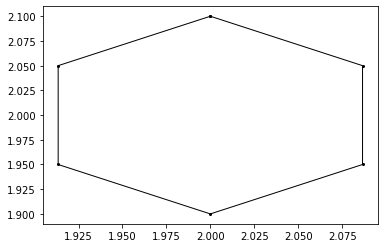

In [13]:
### DEFINIÇÃO DE POLÍGONOS REGULARES

poliReg = []


#Função para plotagem de pontos em à partir de uma circunferência, formando um polígono regular 
#cuja forma varia de acordo com o número de vértices
def draw_regularPolygon(centroX, centroY, numVertices, raio):
    xCoordinates = [] #Essa lista vai guardar os valores de x de cada ponto da circunferência
    yCoordinates = [] #Lista para os valores de y de cada ponto
    for angle in np.arange(0, 2*math.pi, 2*math.pi/numVertices):
        x = math.sin(angle)*raio + centroX
        y = math.cos(angle)*raio + centroY
        xCoordinates.append(x)
        yCoordinates.append(y)
    xCoordinates.append(xCoordinates[0]) #Adiciona o primeiro item ao final da lista para completar o ciclo
    yCoordinates.append(yCoordinates[0])
#     print(xCoordinates)
    plt.plot(xCoordinates, yCoordinates, '-o', color="black", markersize=2 , lw=1)
    
def desenharPinos():
    draw_regularPolygon(Circ18_X, Circ18_Y, 6, 0.1249)
    draw_regularPolygon(Circ20_X, Circ20_Y, 6, 0.1206)
    
    
draw_regularPolygon(2,2, 6, 0.1)



## PLOTAGEM DOS GRÁFICOS

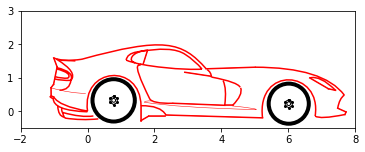

<Figure size 1152x1152 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [14]:
#Define características dos gráficos.
#path define uma segmentação à partir de pontos.
#facecolor define uma cor para à area das funcões
#edgecolor define uma cor para as linhas.
#lw é line-weight. Define a espessura das linhas
patch = patches.PathPatch(path, facecolor='none',
                         edgecolor='red', lw=1.5)

sPatch = patches.PathPatch(sPath, facecolor='none',
                          edgecolor='red', lw=0.5)


ax = plt.gca();

ax.add_patch(patch) #Qudráticas padrão e cúbicas
 
ax.add_patch(sPatch) #Quadrática Suave

#xs, ys = zip(*verts)

###########

# figure, axes = plt.subplots()
# draw_circle = plt.Circle((0.5,0.5), 0.3, fill=False, lw='3')

##########

ax.set_xlim(-2, 8) #Define os limites no eixo x do gráfico. 
ax.set_ylim(-0.5, 3) #Define os limites no ixo y do gráfico.
ax.set_aspect(1) # 'auto'; 'equal'; number (equal = 1)

# plt.plot([0,0], [2, 2], color = 'k')

retasIntervaladas(pontos) #Retas
s_retasIntervaladas (pontos) #Retas suaves (de menos destaque)
desenhaCircunferencias(circ) #Circunferencia
desenharPinos()


plt.figure(figsize=(16, 16))
plt.figure(dpi=100)
# ax.add_artist(draw_circle)



plt.show()